# Define a Decision Tree for a Predictive Maintenance Problem (Homework 4.3 of lesson ML05)

Powered by: Dr. Hermann Völlinger, DHBW Stuttgart(Germany); August 2020, following ideas from Seminarpaper (DHBW SS2020): 
"Calculation of Decision Trees using GINI-Index" from Heike Fitzke and Paul Mäder.

The solution is part of seminarpaper SW07 in the list of seminarpapers 
(http://wwwlehre.dhbw-stuttgart.de/~hvoellin/Themes_ML_Seminar_Paper.pdf) as part of the 
Machine Learning lecture by Hermann Völlinger at DHBW Stuttgart (SS2020). 

To see more details pls. check JP Notebook with name "Homework-H4_3ipynb" or Python Pgm."Homework-H4_3.py" in GitHub Account 
from H.Völlinger: https://github.com/HVoellinger/Lecture-Notes-to-ML-WS2020 
        
The here used algorithms and methods are from Lecture: "ML_Concept&Algorithm (WS2020)"; Chapter ML4. See slides with the titles:
"Build Tree with Gini Index (1/8)" until "Build Tree with Gini Index (8/8)".
    
There are four basic steps when you’re implementing this solution:

1. Import libraries and load and prepare training data.
2. Define the Decision Tree for the example data ("Training Data") 
3. Calculation of the es GINI Indices and Definition of the Nodes.
4. Define the DTree and print the results (incl. Feature values and Nodes)
 

# Step 1: Import libraries and Load & prepare Training Data

1. Import Libraies and check the versions.
2. Import the data from csv-file: "Homework-H3_4-data.csv".
3. Define the value "Yes" of column "Fehler" as "1" else set it to "0".
4. Overwrite the column "Fehler" with the new values.
5. Print now the data to check it (ommit not needed columns).


In [1]:
# Imports of needed libraries

import pandas as pd
import numpy as np
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# to check the time of execution, import function time  
import time

# check the actual versions of the imported libraries
print (pd.__version__)
print (np.__version__)
print (mp.__version__)
print (sk.__version__)

1.0.3
1.18.3
3.2.1
0.22.2.post1


In [2]:
# Prepare and Print Training Data
print('This is the list of 3 features and one target column ("Training Data"):')
data = pd.read_csv('Homework-H4_3-Data.csv')
data['Fehler'] = pd.Series(np.where(data.Fehler.values == 'YES', 1, 0), data.index)
data.drop(['Typ', 'Anl', 'Nr.'], axis=1, inplace=True)
data

This is the list of 3 features and one target column ("Training Data"):


,Temp.,Druck,Füllst.,Fehler
0,244,140,4600,0
1,200,130,4300,0
2,245,108,4100,1
3,250,112,4100,0
4,200,107,4200,0
5,272,170,4400,1
6,265,105,4100,0
7,248,138,4800,1
8,200,194,4500,1


# Step 2: Define the Decision Tree & Calculate GINI Indices

1. Define the features and the target value ("Fehler")
2. Call Function DecisisontreeClassifier with paramters
3. Fit the Decision Tree (DT) model
4. Plot the Dec.Tree

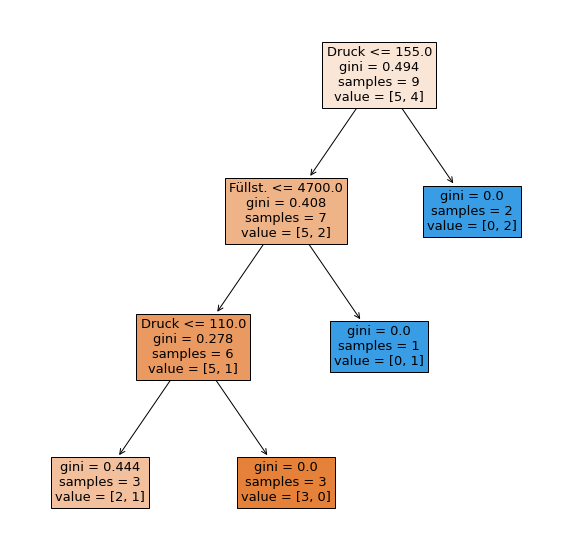

In [4]:
features = ['Temp.', 'Druck', 'Füllst.']
X = data[features]
y = data.Fehler
crv = DecisionTreeClassifier(max_depth=3, criterion='gini')
crv.fit(X,y)
y_pred = crv.predict(X)
fig = plt.figure()
fig.set_size_inches(10,10)
tree_plot = plot_tree(crv, filled=True, 
    feature_names=features, fontsize=13)
plt.show()


# Step 3: Calculation of the GINI Indices and Definition of the Nodes

1. Calculates the Gini indices and returns them as a list for the specified columns.
2. Finds the next node, outputs it and returns the value and column of the affected value.

In [5]:
# Calculates the Gini indices and returns them as a list for the specified columns.

def gini(data, split_points, col):
    ges = len(data.index)
    gini_ind = []
    for x in split_points.index:
        high = data[data[col] >= split_points[col][x]].count()[col]
        high_n = data[(data[col] >= split_points[col][x]) & 
            (data['Fehler'] == 0)].count()[col]
        low = data[data[col] < split_points[col][x]].count()[col]
        low_n = data[(data[col] < split_points[col][x]) & 
            (data['Fehler'] == 0)].count()[col]
        if(low != 0):
            g_low = low/ges*(1-((low-low_n)/low)**2-(low_n/low)**2)
        else:
            g_low = 0
        g_high = high/ges*(1-((high-high_n)/high)**2-(high_n/high)**2)
        gini_ind.append(g_high+g_low)
    return(gini_ind)



In [6]:
# Finds the next node, outputs it and returns the value and column of the affected value.

def get_node(data, test_col):
    gini_table = pd.DataFrame()
    split_points = pd.DataFrame()
    low_gini = 1

    for col in data.columns:
        if(col != test_col):
            sorted_data = data.sort_values(by=col, ignore_index=True)
            for x in range(1, len(sorted_data)):
                split_points.at[x-1, col] = (sorted_data[col][x-1] + 
                    sorted_data[col][x]) / 2
            gini_table[col] = gini(sorted_data, split_points, col)
            if(gini_table[col].min() < low_gini):
                low_gini = gini_table[col].min()
                node_col = col
                node_val = split_points[col][gini_table[col].idxmin()]

    print(split_points)
    print(gini_table)
    print(node_col, node_val)
    return (node_val, node_col)


# Step 4: Define the tree and print the results (inclusive all feature-values and nodes)

1. Define the tree with it nodes by running the logic of teh lesson
2. Print the data for all Values of the features
3. Print and show the node values foe all three features

In [7]:
def tree(data, test_col):
    l_data = data.copy()
    while(len(l_data.columns) > 1 and not l_data.empty):
        node = get_node(l_data, test_col)
        l_data.drop(index = l_data[l_data[node[1]] >= 
            node[0]].index, inplace = True)
        l_data.drop(columns = node[1], inplace = True)
        l_data.reset_index(drop = True, inplace = True)
    return


Print the result, ie.:
-> a. Print all steps with it results.
-> b. Print the nodea and its values. 

In [8]:
# Print all steps with it results
# Print the node and its value 

tree(data, 'Fehler')

   Temp.  Druck  Füllst.
0  200.0  106.0   4100.0
1  200.0  107.5   4100.0
2  222.0  110.0   4150.0
3  244.5  121.0   4250.0
4  246.5  134.0   4350.0
5  249.0  139.0   4450.0
6  257.5  155.0   4550.0
7  268.5  182.0   4700.0
      Temp.     Druck   Füllst.
0  0.493827  0.444444  0.493827
1  0.493827  0.380952  0.493827
2  0.481481  0.481481  0.481481
3  0.433333  0.433333  0.433333
4  0.488889  0.344444  0.344444
5  0.481481  0.444444  0.444444
6  0.492063  0.317460  0.492063
7  0.416667  0.416667  0.416667
Druck 155.0
   Temp.  Füllst.
0  200.0   4100.0
1  222.0   4100.0
2  244.5   4150.0
3  246.5   4250.0
4  249.0   4450.0
5  257.5   4700.0
      Temp.   Füllst.
0  0.408163  0.408163
1  0.342857  0.408163
2  0.285714  0.404762
3  0.404762  0.404762
4  0.342857  0.371429
5  0.380952  0.238095
Füllst. 4700.0
   Temp.
0  200.0
1  222.0
2  244.5
3  247.5
4  257.5
      Temp.
0  0.277778
1  0.250000
2  0.222222
3  0.250000
4  0.266667
Temp. 244.5


In [9]:
# print current date and time
print("date",time.strftime("%d.%m.%Y %H:%M:%S"))
print ("******** end of Homework H4.3 ******************")


date 07.08.2020 22:57:32
******** end of Homework H4.3 ******************
